In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [43]:
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/train', transform=train_transforms)
test_dataset = datasets.ImageFolder('image/Pistachio_Image_Dataset/test', transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True,generator=torch.Generator(device='cuda'))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False,generator=torch.Generator(device='cuda'))

In [44]:
class RBFNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RBFNet, self).__init__()
        self.first_layer = nn.Linear(input_dim,hidden_dim)
        self.hidden_layer = nn.Linear(hidden_dim,output_dim)
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.s = 0.02
        self.centers = nn.Parameter(torch.randn(input_dim,hidden_dim))
        # print(self.centers)
    def formula(self,x,y):
        return torch.exp(-self.s * (x.unsqueeze(1) - y).pow(2).sum(dim=1))

    def forward(self,x):
        x = x.view(-1, 12288)
        x = self.first_layer(x)
        x = self.hidden_layer(x)
        # print(out3.unsqueeze(1))
        a = self.formula(x, self.centers)
        return a

In [45]:
input_size = 64 * 64 * 3
hidden_size = 10
output_size = 10
train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []


In [46]:
rbf_net = RBFNet(input_size, hidden_size, output_size)
rbf_net =  rbf_net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(rbf_net.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    train_acc = 0.0
    val_loss = 0.0
    val_acc = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.view(-1, input_size)
        optimizer.zero_grad()
        outputs = rbf_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (outputs.argmax(1) == labels).sum().item()

    train_loss /= len(train_loader)
    train_loss_history.append(train_loss)
    train_acc /= len(train_loader.dataset)
    train_acc_history.append(train_acc)

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs = inputs.view(-1, input_size)
            outputs = rbf_net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.argmax(1) == labels).sum().item()

    val_loss /= len(test_loader)
    val_loss_history.append(val_loss)
    val_acc /= len(test_loader.dataset)
    val_acc_history.append(val_acc)

    print(f'Epoch {epoch+1}/{num_epochs}, train loss: {train_loss:.4f}, train acc: {train_acc:.4f}, val loss: {val_loss:.4f}, val acc: {val_acc:.4f}')

Epoch 1/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 2/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 3/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 4/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 5/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 6/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 7/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 8/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 9/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742
Epoch 10/10, train loss: 2.3026, train acc: 0.5729, val loss: 2.3026, val acc: 0.5742


1


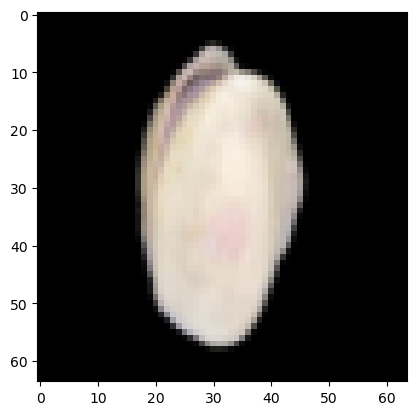

In [47]:
img, label = test_dataset[950]
plt.imshow(img.permute((1, 2, 0)))
print(label)

In [48]:
from PIL import Image
from torch import nn, save, load

In [61]:
from torchvision.transforms import ToTensor
# img = Image.open('horse.jpeg') 
input_size = 64 * 64 * 3
# plt.imshow(img)
img,label = test_dataset[239]
# img = img.to(device)
# label = label.to(device)
img = img.view(-1, input_size)
img = np.array(img)
# img = img.resize((1, 32, 32, 3))
img_tensor = ToTensor()(img).unsqueeze(0).to(device)
print(torch.argmax(rbf_net(img_tensor)))

tensor(0)
